In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np
from datetime import datetime

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Librerías para preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos de Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Métricas de evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Utilidades
import joblib
import os

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [2]:
# Carga de datasets
df_economy = pd.read_excel('economy.xlsx')
df_business = pd.read_excel('business.xlsx')

print("="*80)
print("CARGA DE DATOS COMPLETADA")
print("="*80)
print(f"\nDataset Economy: {df_economy.shape[0]} filas, {df_economy.shape[1]} columnas")
print(f"Dataset Business: {df_business.shape[0]} filas, {df_business.shape[1]} columnas")

CARGA DE DATOS COMPLETADA

Dataset Economy: 206774 filas, 11 columnas
Dataset Business: 93487 filas, 11 columnas


In [3]:
df_business.head(5)
df_economy.head(5)
df_economy.info()
df_business.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        206774 non-null  datetime64[ns]
 1   airline     206774 non-null  object        
 2   ch_code     206774 non-null  object        
 3   num_code    206774 non-null  int64         
 4   dep_time    206774 non-null  object        
 5   from        206774 non-null  object        
 6   time_taken  206774 non-null  object        
 7   stop        206774 non-null  object        
 8   arr_time    206774 non-null  object        
 9   to          206774 non-null  object        
 10  price       206774 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 17.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------

In [4]:
# Inspección inicial - Economy
print("="*80)
print("DATASET ECONOMY - PRIMERAS FILAS")
print("="*80)
print(df_economy.head(10))
print("\n" + "="*80)
print("INFORMACIÓN GENERAL - ECONOMY")
print("="*80)
print(df_economy.info())
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - ECONOMY")
print("="*80)
print(df_economy.describe())

DATASET ECONOMY - PRIMERAS FILAS
        date   airline ch_code  num_code  dep_time   from time_taken  \
0 2022-02-11  SpiceJet      SG      8709  18:55:00  Delhi    02h 10m   
1 2022-02-11  SpiceJet      SG      8157  06:20:00  Delhi    02h 20m   
2 2022-02-11   AirAsia      I5       764  04:25:00  Delhi    02h 10m   
3 2022-02-11   Vistara      UK       995  10:20:00  Delhi    02h 15m   
4 2022-02-11   Vistara      UK       963  08:50:00  Delhi    02h 20m   
5 2022-02-11   Vistara      UK       945  11:40:00  Delhi    02h 20m   
6 2022-02-11   Vistara      UK       927  09:30:00  Delhi    02h 05m   
7 2022-02-11   Vistara      UK       951  14:20:00  Delhi    02h 10m   
8 2022-02-11  GO FIRST      G8       334  08:00:00  Delhi    02h 10m   
9 2022-02-11  GO FIRST      G8       336  14:20:00  Delhi    02h 15m   

       stop  arr_time      to  price  
0  non-stop  21:05:00  Mumbai   5953  
1  non-stop  08:40:00  Mumbai   5953  
2  non-stop  06:35:00  Mumbai   5956  
3  non-stop  12:35

In [5]:
# Inspección inicial - Business
print("="*80)
print("DATASET BUSINESS - PRIMERAS FILAS")
print("="*80)
print(df_business.head(10))
print("\n" + "="*80)
print("INFORMACIÓN GENERAL - BUSINESS")
print("="*80)
print(df_business.info())
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - BUSINESS")
print("="*80)
print(df_business.describe())


DATASET BUSINESS - PRIMERAS FILAS
        date    airline ch_code  num_code  dep_time   from time_taken  \
0 2022-02-11  Air India      AI       868  18:00:00  Delhi    02h 00m   
1 2022-02-11  Air India      AI       624  19:00:00  Delhi    02h 15m   
2 2022-02-11  Air India      AI       531  20:00:00  Delhi    24h 45m   
3 2022-02-11  Air India      AI       839  21:25:00  Delhi    26h 30m   
4 2022-02-11  Air India      AI       544  17:15:00  Delhi    06h 40m   
5 2022-02-11    Vistara      UK       985  19:50:00  Delhi    02h 10m   
6 2022-02-11  Air India      AI       479  21:15:00  Delhi    17h 45m   
7 2022-02-11  Air India      AI       473  18:40:00  Delhi    22h 45m   
8 2022-02-11    Vistara      UK       871  20:35:00  Delhi    17h 55m   
9 2022-02-11    Vistara      UK       977  19:00:00  Delhi    02h 15m   

                                                stop  arr_time      to  price  
0                                           non-stop  20:00:00  Mumbai  25612  
1 

In [6]:
def data_quality_report(df, dataset_name):
    """
    Genera reporte completo de calidad de datos
    
    Args:
        df: DataFrame a analizar
        dataset_name: Nombre del dataset para identificación
    """
    print("="*80)
    print(f"REPORTE DE CALIDAD - {dataset_name}")
    print("="*80)
    
    # Valores nulos
    print("\n1. VALORES NULOS")
    print("-"*80)
    null_counts = df.isnull().sum()
    null_pct = (df.isnull().sum() / len(df)) * 100
    null_df = pd.DataFrame({
        'Columna': null_counts.index,
        'Nulos': null_counts.values,
        'Porcentaje': null_pct.values
    })
    print(null_df[null_df['Nulos'] > 0])
    
    # Duplicados
    print("\n2. REGISTROS DUPLICADOS")
    print("-"*80)
    duplicates = df.duplicated().sum()
    print(f"Total de duplicados: {duplicates} ({(duplicates/len(df)*100):.2f}%)")
    
    # Tipos de datos
    print("\n3. TIPOS DE DATOS")
    print("-"*80)
    print(df.dtypes)
    
    # Valores únicos
    print("\n4. CARDINALIDAD (Valores únicos)")
    print("-"*80)
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count} valores únicos")
    
    # Detección de outliers en variables numéricas
    print("\n5. OUTLIERS (Método IQR)")
    print("-"*80)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        outliers_pct = (outliers / len(df)) * 100
        print(f"{col}: {outliers} outliers ({outliers_pct:.2f}%)")
    
    return null_df

# Ejecutar reporte para ambos datasets
null_economy = data_quality_report(df_economy, "ECONOMY")
print("\n\n")
null_business = data_quality_report(df_business, "BUSINESS")

REPORTE DE CALIDAD - ECONOMY

1. VALORES NULOS
--------------------------------------------------------------------------------
Empty DataFrame
Columns: [Columna, Nulos, Porcentaje]
Index: []

2. REGISTROS DUPLICADOS
--------------------------------------------------------------------------------


Total de duplicados: 2 (0.00%)

3. TIPOS DE DATOS
--------------------------------------------------------------------------------
date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
price                  int64
dtype: object

4. CARDINALIDAD (Valores únicos)
--------------------------------------------------------------------------------
date: 49 valores únicos
airline: 8 valores únicos
ch_code: 8 valores únicos
num_code: 1254 valores únicos
dep_time: 251 valores únicos
from: 6 valores únicos
time_taken: 483 valores únicos
stop: 37 valores únicos
arr_time: 266 valores únicos
to: 6 valores únicos
price: 9819 valores únicos

5. OUTLIERS (Método IQR)
--------------------------------------------------------------------------------
num_code: 41993 outliers

In [7]:
print("="*80)
print("ESTRATEGIA DE TRATAMIENTO DE DATOS")
print("="*80)

estrategia = """
ESTRATEGIAS DEFINIDAS:

1. VALORES NULOS:
   - Si < 5%: Imputación por moda (categóricas) o mediana (numéricas)
   - Si > 5%: Análisis detallado y decisión caso por caso
   - Alternativa: Crear flag indicador de nulo si es relevante

2. DUPLICADOS:
   - Eliminación de registros completamente duplicados
   - Análisis de duplicados parciales (misma ruta/fecha pero diferente precio)

3. OUTLIERS:
   - Precios: Análisis de percentiles (mantener si son casos reales de negocio)
   - Tiempos de vuelo: Validación de coherencia
   - No eliminación automática, análisis contextual

4. TIPOS DE DATOS:
   - Conversión de fechas a datetime
   - Conversión de tiempos a formato numérico (minutos)
   - Encoding de variables categóricas

5. FEATURE ENGINEERING:
   - Extracción de características temporales (día, mes, día de semana)
   - Creación de variable 'clase' (economy/business)
   - Cálculo de anticipación de compra si aplica
   - Binning de variables continuas si es necesario

6. COMBINACIÓN DE DATASETS:
   - Unión vertical de economy y business
   - Creación de variable identificadora de clase
"""

print(estrategia)

ESTRATEGIA DE TRATAMIENTO DE DATOS

ESTRATEGIAS DEFINIDAS:

1. VALORES NULOS:
   - Si < 5%: Imputación por moda (categóricas) o mediana (numéricas)
   - Si > 5%: Análisis detallado y decisión caso por caso
   - Alternativa: Crear flag indicador de nulo si es relevante

2. DUPLICADOS:
   - Eliminación de registros completamente duplicados
   - Análisis de duplicados parciales (misma ruta/fecha pero diferente precio)

3. OUTLIERS:
   - Precios: Análisis de percentiles (mantener si son casos reales de negocio)
   - Tiempos de vuelo: Validación de coherencia
   - No eliminación automática, análisis contextual

4. TIPOS DE DATOS:
   - Conversión de fechas a datetime
   - Conversión de tiempos a formato numérico (minutos)
   - Encoding de variables categóricas

5. FEATURE ENGINEERING:
   - Extracción de características temporales (día, mes, día de semana)
   - Creación de variable 'clase' (economy/business)
   - Cálculo de anticipación de compra si aplica
   - Binning de variables continuas 

In [8]:
# Investigar por qué 'price' en business es object
print("="*80)
print("INVESTIGACIÓN: PRICE EN BUSINESS (tipo object)")
print("="*80)
print("\nMuestra de valores de price en business:")
print(df_business['price'].head(20))
print("\nValores únicos problemáticos:")
print(df_business['price'].value_counts().head(10))

# Buscar valores no numéricos
non_numeric_prices = df_business[pd.to_numeric(df_business['price'], errors='coerce').isna()]['price']
print(f"\nValores no numéricos encontrados: {len(non_numeric_prices)}")
if len(non_numeric_prices) > 0:
    print(non_numeric_prices.value_counts())

INVESTIGACIÓN: PRICE EN BUSINESS (tipo object)

Muestra de valores de price en business:
0     25612
1     25612
2     42220
3     44450
4     46690
5     50264
6     50669
7     51059
8     51731
9     53288
10    56081
11    56081
12    57074
13    57074
14    57074
15    57074
16    57868
17    57868
18    57868
19    59996
Name: price, dtype: object

Valores únicos problemáticos:
price
54608    1445
54684    1390
60978    1383
60508    1230
49725    1205
51707    1205
49613    1150
56588    1111
55983    1108
60260    1107
Name: count, dtype: int64

Valores no numéricos encontrados: 108
price
1,02,114    8
1,02,648    7
1,05,764    4
1,02,404    3
1,01,780    3
           ..
1,09,776    1
1,06,416    1
1,14,704    1
1,02,832    1
1,04,624    1
Name: count, Length: 69, dtype: int64


In [9]:
# Análisis de formato de tiempo
print("="*80)
print("ANÁLISIS DE VARIABLES DE TIEMPO")
print("="*80)

print("\nFormato de dep_time:")
print(df_economy['dep_time'].head(10))

print("\nFormato de arr_time:")
print(df_economy['arr_time'].head(10))

print("\nFormato de time_taken:")
print(df_economy['time_taken'].head(10))
print(df_economy['time_taken'].value_counts().head(10))

ANÁLISIS DE VARIABLES DE TIEMPO

Formato de dep_time:
0    18:55:00
1    06:20:00
2    04:25:00
3    10:20:00
4    08:50:00
5    11:40:00
6    09:30:00
7    14:20:00
8    08:00:00
9    14:20:00
Name: dep_time, dtype: object

Formato de arr_time:
0    21:05:00
1    08:40:00
2    06:35:00
3    12:35:00
4    11:10:00
5    14:00:00
6    11:35:00
7    16:30:00
8    10:10:00
9    16:35:00
Name: arr_time, dtype: object

Formato de time_taken:
0    02h 10m
1    02h 20m
2    02h 10m
3    02h 15m
4    02h 20m
5    02h 20m
6    02h 05m
7    02h 10m
8    02h 10m
9    02h 15m
Name: time_taken, dtype: object
time_taken
02h 10m    3081
02h 15m    2912
02h 45m    2006
02h 05m    1969
02h 50m    1723
02h 20m    1537
08h 00m    1485
07h 35m    1443
12h 00m    1432
06h 40m    1420
Name: count, dtype: int64


In [10]:
# Combinar datasets y crear variable de clase
print("="*80)
print("COMBINACIÓN DE DATASETS")
print("="*80)

# Convertir price en business a numérico
df_business['price'] = pd.to_numeric(df_business['price'], errors='coerce')

# Agregar columna de clase
df_economy['class'] = 'economy'
df_business['class'] = 'business'

# Combinar datasets
df_combined = pd.concat([df_economy, df_business], axis=0, ignore_index=True)

print(f"Dataset combinado: {df_combined.shape[0]} filas, {df_combined.shape[1]} columnas")
print(f"Economy: {len(df_economy)} | Business: {len(df_business)}")
print(f"\nVerificación de nulos en price después de conversión:")
print(f"Nulos en price: {df_combined['price'].isnull().sum()}")

COMBINACIÓN DE DATASETS
Dataset combinado: 300261 filas, 12 columnas
Economy: 206774 | Business: 93487

Verificación de nulos en price después de conversión:
Nulos en price: 108


ANÁLISIS UNIVARIADO - VARIABLE OBJETIVO: PRICE


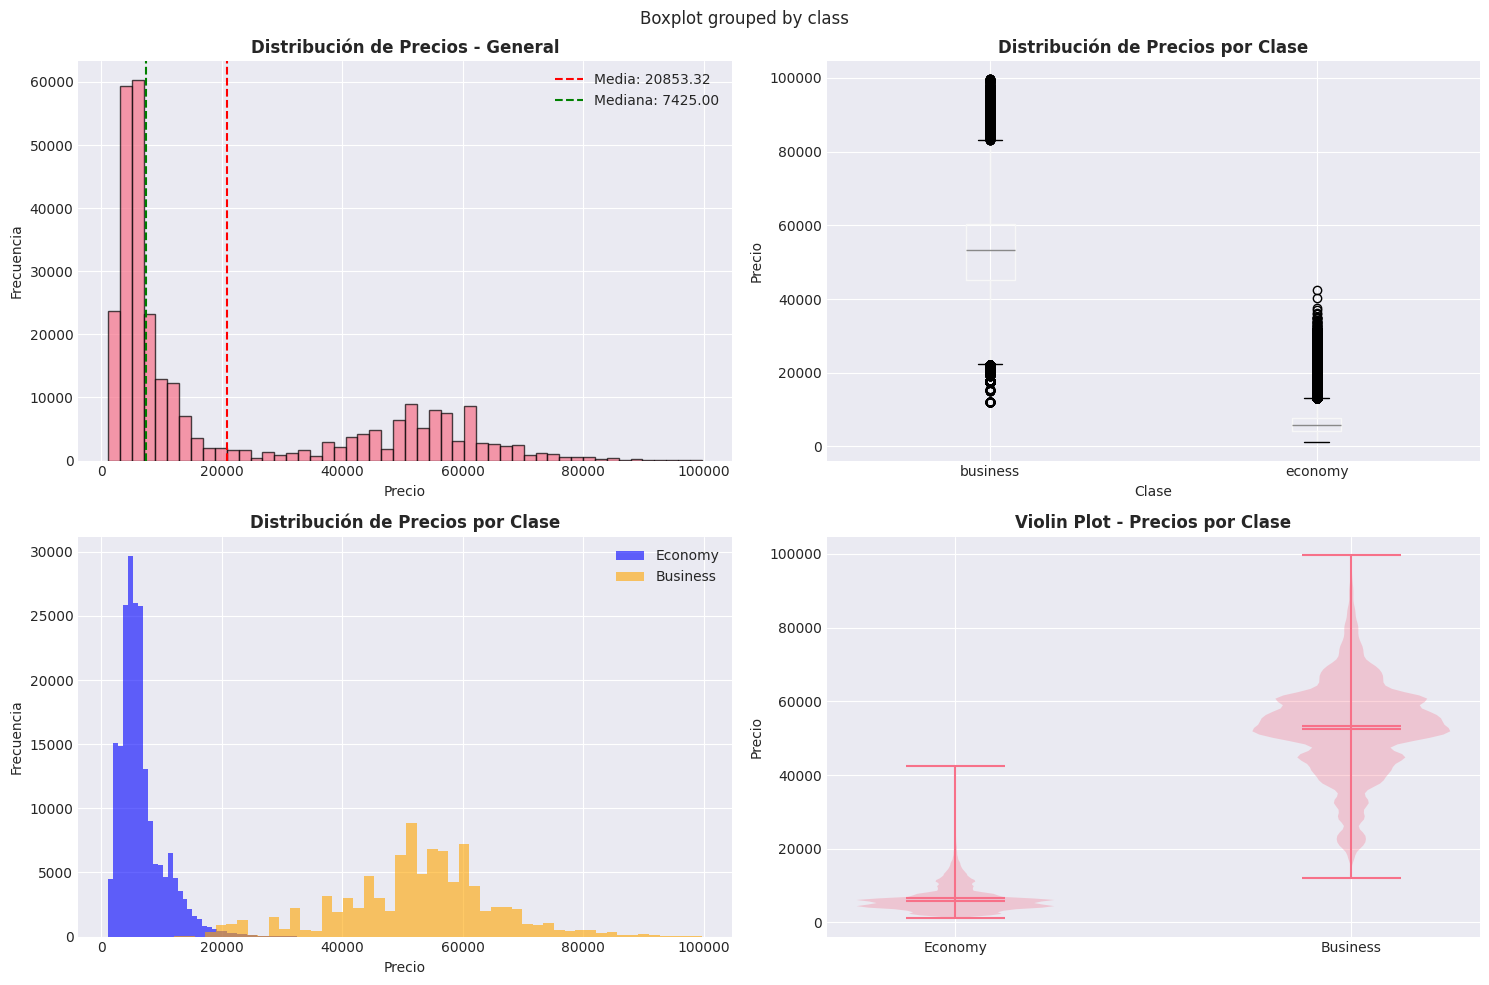


Estadísticas de Precio por Clase:
             count          mean           std      min      25%      50%  \
class                                                                       
business   93379.0  52478.988220  12850.787066  12000.0  45185.0  53164.0   
economy   206774.0   6571.190701   3743.442838   1105.0   4173.0   5772.0   

              75%      max  
class                       
business  60396.0  99680.0  
economy    7746.0  42349.0  


In [11]:
# EDA Univariado - Variable Objetivo (Price)
print("="*80)
print("ANÁLISIS UNIVARIADO - VARIABLE OBJETIVO: PRICE")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma general
axes[0, 0].hist(df_combined['price'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución de Precios - General', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Precio')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df_combined['price'].mean(), color='red', linestyle='--', label=f'Media: {df_combined["price"].mean():.2f}')
axes[0, 0].axvline(df_combined['price'].median(), color='green', linestyle='--', label=f'Mediana: {df_combined["price"].median():.2f}')
axes[0, 0].legend()

# Boxplot por clase
df_combined.boxplot(column='price', by='class', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Precios por Clase', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Clase')
axes[0, 1].set_ylabel('Precio')
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Histograma por clase
df_economy['price'].hist(bins=50, alpha=0.6, label='Economy', ax=axes[1, 0], color='blue')
df_business['price'].dropna().hist(bins=50, alpha=0.6, label='Business', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribución de Precios por Clase', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Precio')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()

# Violin plot
parts = axes[1, 1].violinplot([df_economy['price'], df_business['price'].dropna()], 
                               positions=[1, 2], showmeans=True, showmedians=True)
axes[1, 1].set_title('Violin Plot - Precios por Clase', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Economy', 'Business'])
axes[1, 1].set_ylabel('Precio')

plt.tight_layout()
plt.show()

# Estadísticas por clase
print("\nEstadísticas de Precio por Clase:")
print(df_combined.groupby('class')['price'].describe())

ANÁLISIS UNIVARIADO - VARIABLES CATEGÓRICAS


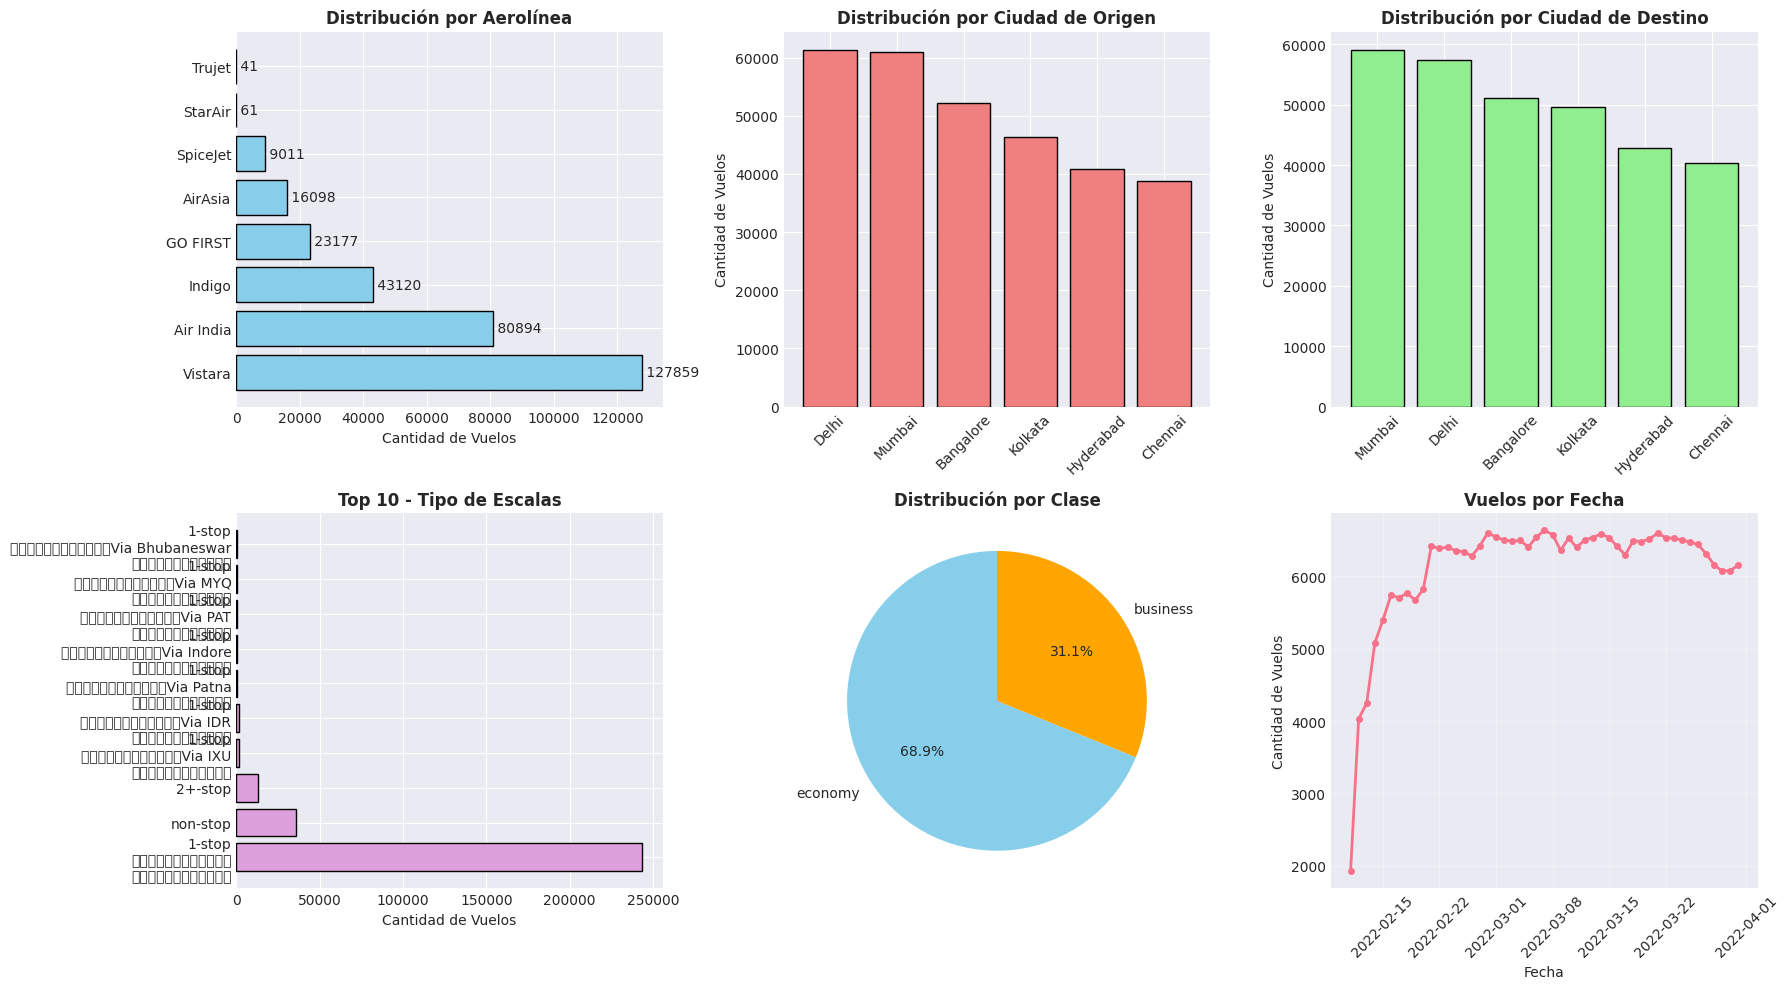


Resumen de Variables Categóricas:
Aerolíneas: 8
Ciudades de origen: 6
Ciudades de destino: 6
Tipos de escalas: 40


In [12]:
# EDA Univariado - Variables Categóricas
print("="*80)
print("ANÁLISIS UNIVARIADO - VARIABLES CATEGÓRICAS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Aerolíneas
airline_counts = df_combined['airline'].value_counts()
axes[0, 0].barh(airline_counts.index, airline_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución por Aerolínea', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Cantidad de Vuelos')
for i, v in enumerate(airline_counts.values):
    axes[0, 0].text(v, i, f' {v}', va='center')

# Origen
from_counts = df_combined['from'].value_counts()
axes[0, 1].bar(from_counts.index, from_counts.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribución por Ciudad de Origen', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Cantidad de Vuelos')
axes[0, 1].tick_params(axis='x', rotation=45)

# Destino
to_counts = df_combined['to'].value_counts()
axes[0, 2].bar(to_counts.index, to_counts.values, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Distribución por Ciudad de Destino', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Cantidad de Vuelos')
axes[0, 2].tick_params(axis='x', rotation=45)

# Escalas (top 10)
stop_counts = df_combined['stop'].value_counts().head(10)
axes[1, 0].barh(stop_counts.index, stop_counts.values, color='plum', edgecolor='black')
axes[1, 0].set_title('Top 10 - Tipo de Escalas', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Cantidad de Vuelos')

# Clase
class_counts = df_combined['class'].value_counts()
axes[1, 1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
               colors=['skyblue', 'orange'], startangle=90)
axes[1, 1].set_title('Distribución por Clase', fontsize=12, fontweight='bold')

# Vuelos por fecha
date_counts = df_combined['date'].value_counts().sort_index()
axes[1, 2].plot(date_counts.index, date_counts.values, marker='o', linewidth=2, markersize=4)
axes[1, 2].set_title('Vuelos por Fecha', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Fecha')
axes[1, 2].set_ylabel('Cantidad de Vuelos')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResumen de Variables Categóricas:")
print(f"Aerolíneas: {df_combined['airline'].nunique()}")
print(f"Ciudades de origen: {df_combined['from'].nunique()}")
print(f"Ciudades de destino: {df_combined['to'].nunique()}")
print(f"Tipos de escalas: {df_combined['stop'].nunique()}")

ANÁLISIS TEMPORAL


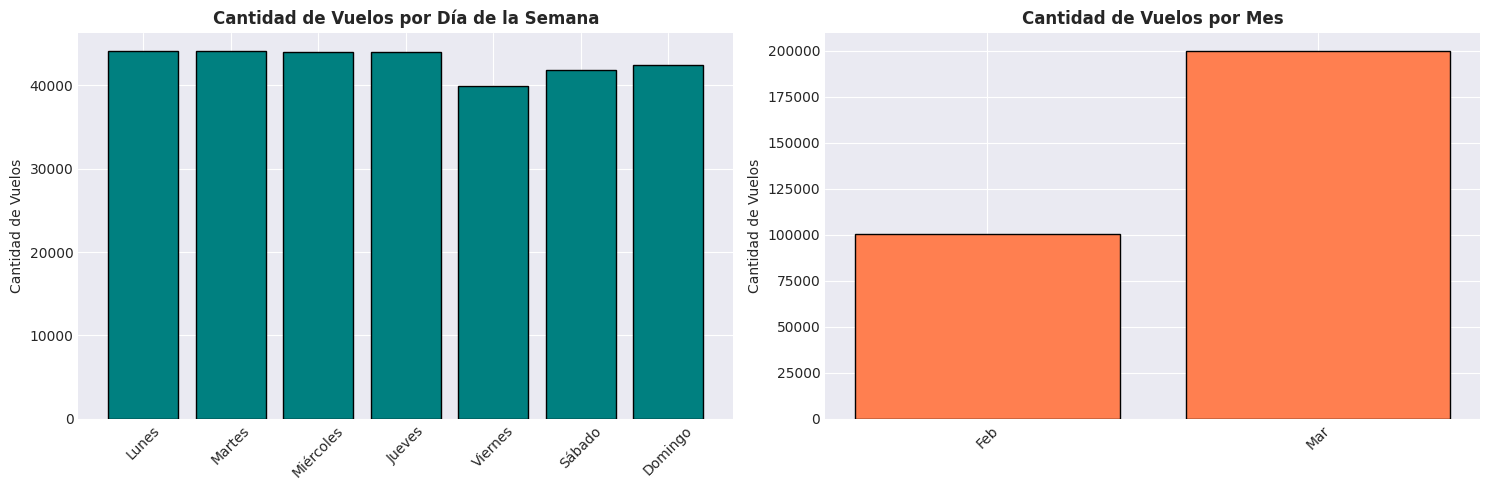


Rango de fechas: 2022-02-11 00:00:00 a 2022-03-31 00:00:00
Meses únicos: 2


In [13]:
# Análisis temporal
print("="*80)
print("ANÁLISIS TEMPORAL")
print("="*80)

# Extraer características temporales
df_combined['year'] = df_combined['date'].dt.year
df_combined['month'] = df_combined['date'].dt.month
df_combined['day'] = df_combined['date'].dt.day
df_combined['day_of_week'] = df_combined['date'].dt.dayofweek
df_combined['week_of_year'] = df_combined['date'].dt.isocalendar().week

# Mapeo de días de la semana
day_names = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 
             4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_combined['day_name'] = df_combined['day_of_week'].map(day_names)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Vuelos por día de la semana
day_counts = df_combined['day_name'].value_counts().reindex(['Lunes', 'Martes', 'Miércoles', 
                                                               'Jueves', 'Viernes', 'Sábado', 'Domingo'])
axes[0].bar(day_counts.index, day_counts.values, color='teal', edgecolor='black')
axes[0].set_title('Cantidad de Vuelos por Día de la Semana', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cantidad de Vuelos')
axes[0].tick_params(axis='x', rotation=45)

# Vuelos por mes
month_counts = df_combined['month'].value_counts().sort_index()
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
axes[1].bar([month_names[m-1] for m in month_counts.index], month_counts.values, 
            color='coral', edgecolor='black')
axes[1].set_title('Cantidad de Vuelos por Mes', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cantidad de Vuelos')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\nRango de fechas: {df_combined['date'].min()} a {df_combined['date'].max()}")
print(f"Meses únicos: {df_combined['month'].nunique()}")

ANÁLISIS BIVARIADO - PRICE VS VARIABLES CATEGÓRICAS


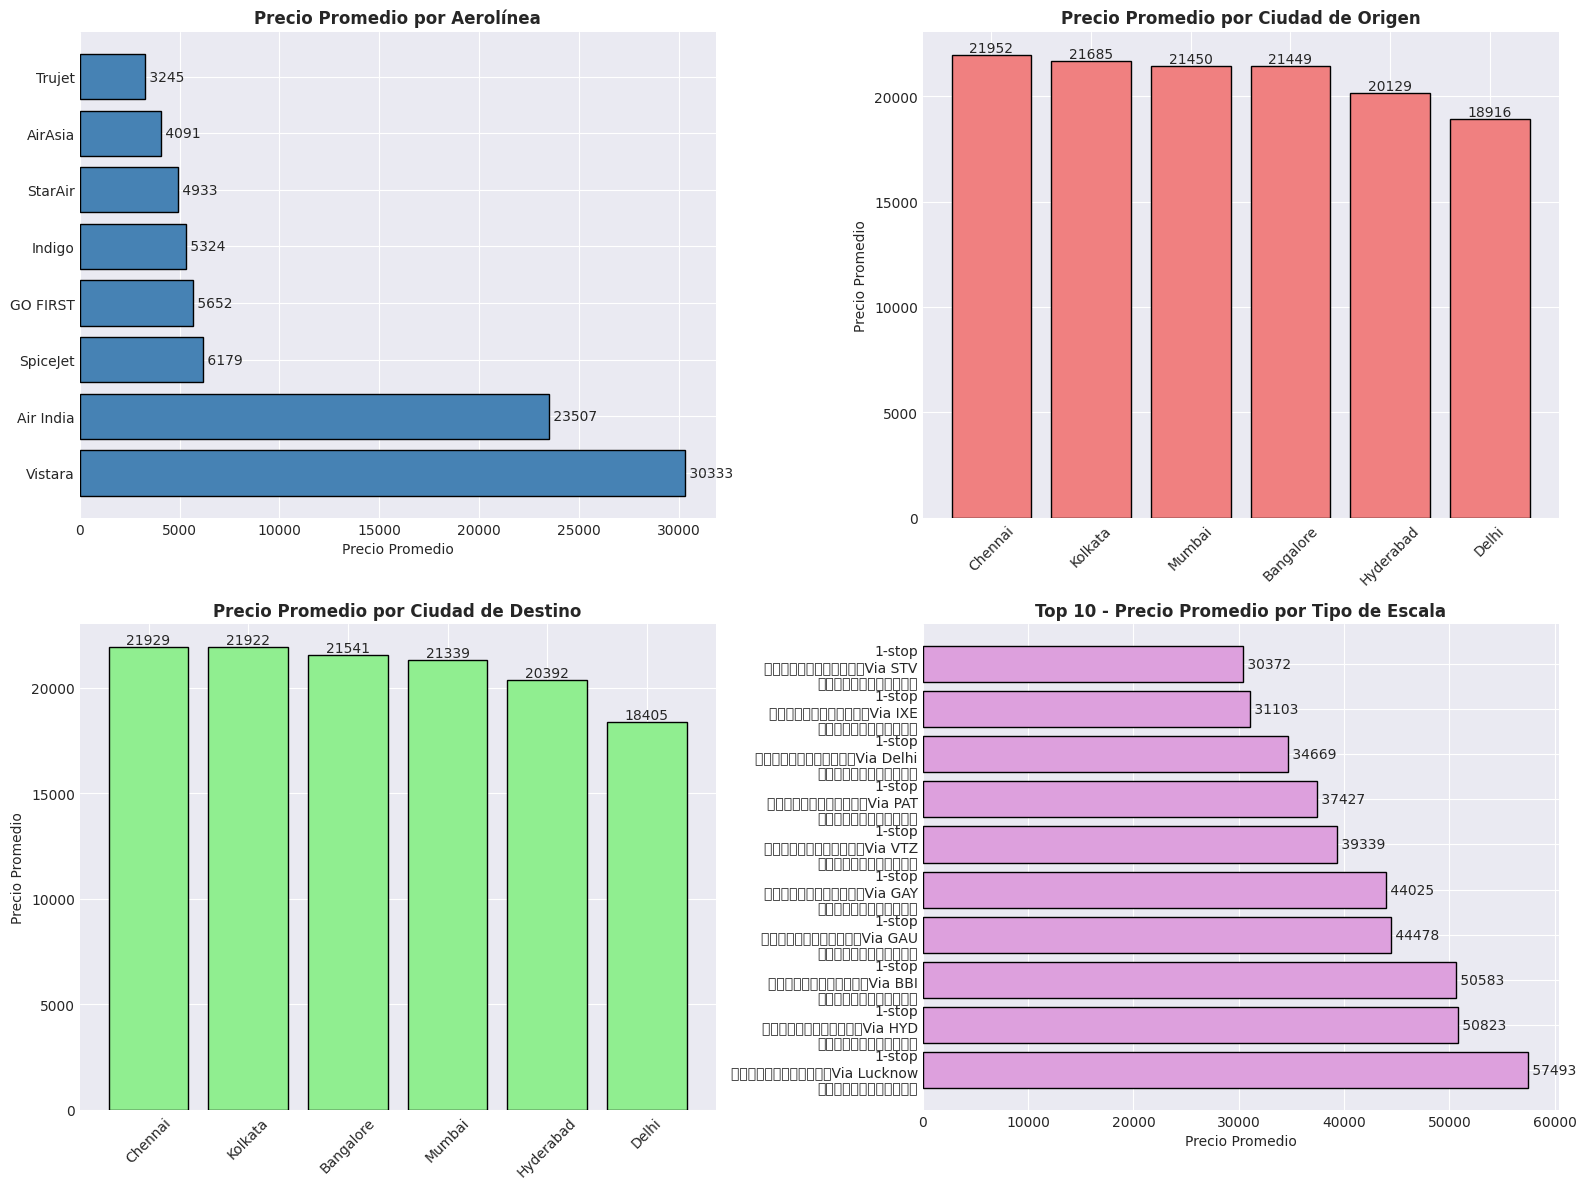

In [14]:
# Análisis Bivariado - Price vs Variables Categóricas
print("="*80)
print("ANÁLISIS BIVARIADO - PRICE VS VARIABLES CATEGÓRICAS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price vs Airline
airline_price = df_combined.groupby('airline')['price'].mean().sort_values(ascending=False)
axes[0, 0].barh(airline_price.index, airline_price.values, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Precio Promedio por Aerolínea', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Precio Promedio')
for i, v in enumerate(airline_price.values):
    axes[0, 0].text(v, i, f' {v:.0f}', va='center')

# Price vs Origin
from_price = df_combined.groupby('from')['price'].mean().sort_values(ascending=False)
axes[0, 1].bar(from_price.index, from_price.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Precio Promedio por Ciudad de Origen', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Precio Promedio')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, (idx, v) in enumerate(from_price.items()):
    axes[0, 1].text(i, v, f'{v:.0f}', ha='center', va='bottom')

# Price vs Destination
to_price = df_combined.groupby('to')['price'].mean().sort_values(ascending=False)
axes[1, 0].bar(to_price.index, to_price.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Precio Promedio por Ciudad de Destino', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Precio Promedio')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, (idx, v) in enumerate(to_price.items()):
    axes[1, 0].text(i, v, f'{v:.0f}', ha='center', va='bottom')

# Price vs Stop (top 10)
stop_price = df_combined.groupby('stop')['price'].mean().sort_values(ascending=False).head(10)
axes[1, 1].barh(stop_price.index, stop_price.values, color='plum', edgecolor='black')
axes[1, 1].set_title('Top 10 - Precio Promedio por Tipo de Escala', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Precio Promedio')
for i, v in enumerate(stop_price.values):
    axes[1, 1].text(v, i, f' {v:.0f}', va='center')

plt.tight_layout()
plt.show()

ANÁLISIS BIVARIADO - PRICE VS VARIABLES TEMPORALES


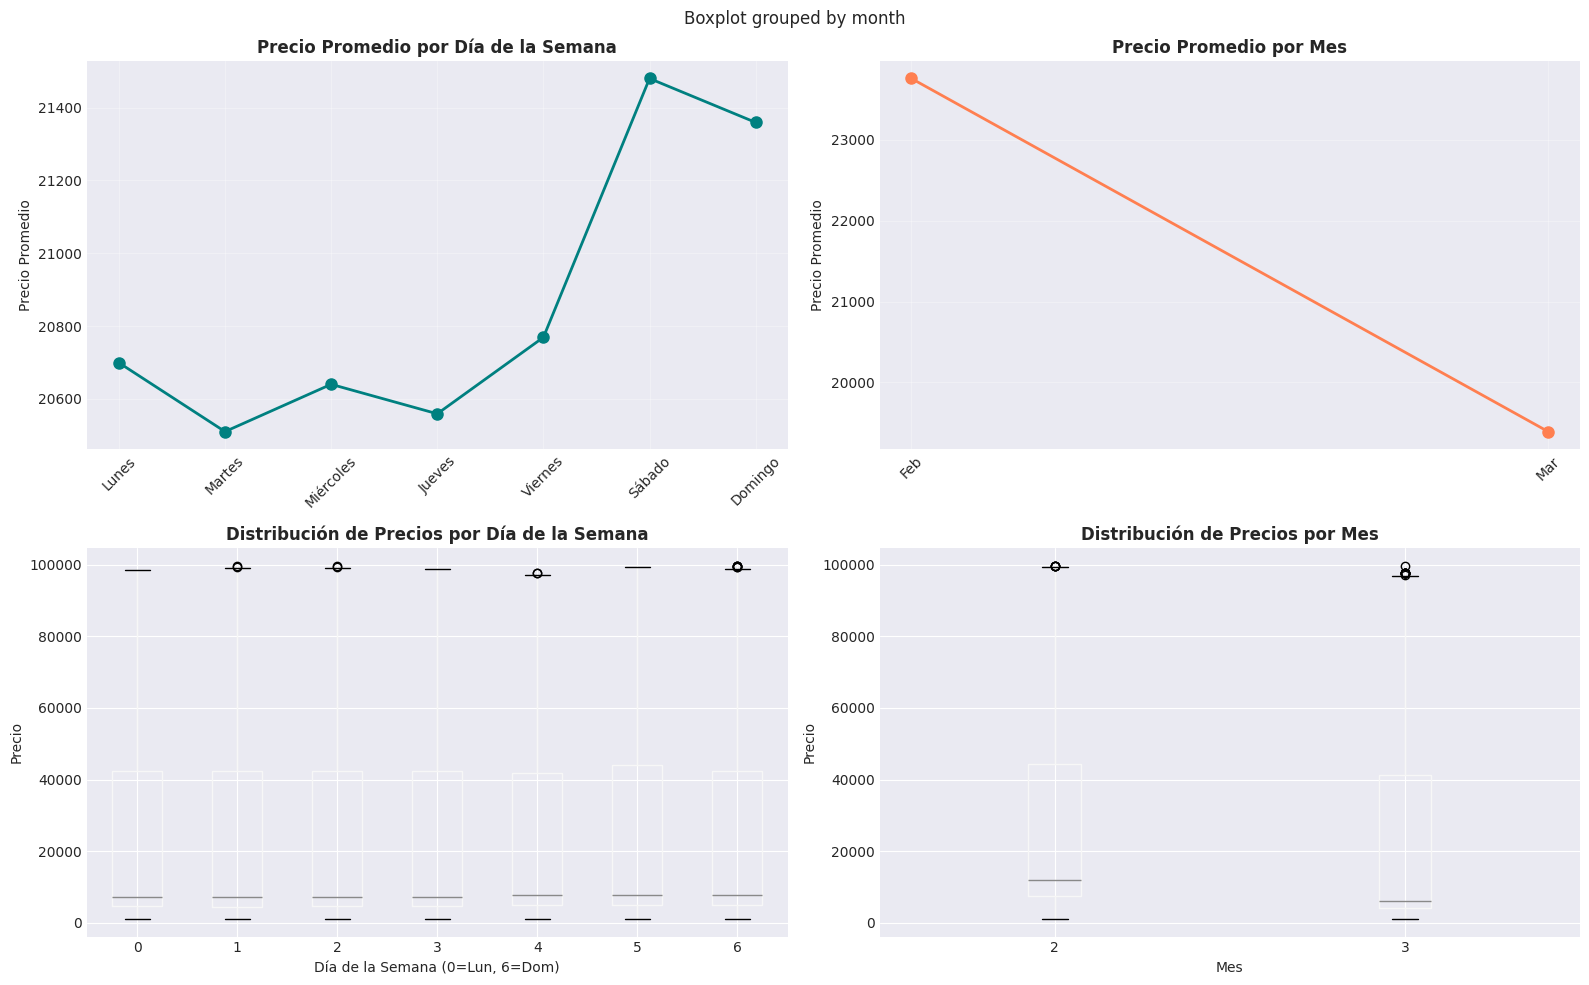

In [15]:
# Price vs Variables Temporales
print("="*80)
print("ANÁLISIS BIVARIADO - PRICE VS VARIABLES TEMPORALES")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Price vs Day of Week
day_price = df_combined.groupby('day_name')['price'].mean().reindex(['Lunes', 'Martes', 'Miércoles', 
                                                                       'Jueves', 'Viernes', 'Sábado', 'Domingo'])
axes[0, 0].plot(day_price.index, day_price.values, marker='o', linewidth=2, markersize=8, color='teal')
axes[0, 0].set_title('Precio Promedio por Día de la Semana', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Precio Promedio')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Price vs Month
month_price = df_combined.groupby('month')['price'].mean().sort_index()
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
axes[0, 1].plot([month_names[m-1] for m in month_price.index], month_price.values, 
                marker='o', linewidth=2, markersize=8, color='coral')
axes[0, 1].set_title('Precio Promedio por Mes', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Precio Promedio')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Boxplot: Price vs Day of Week
df_combined.boxplot(column='price', by='day_of_week', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Precios por Día de la Semana', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Día de la Semana (0=Lun, 6=Dom)')
axes[1, 0].set_ylabel('Precio')
plt.sca(axes[1, 0])

# Boxplot: Price vs Month
df_combined.boxplot(column='price', by='month', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Precios por Mes', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Precio')
plt.sca(axes[1, 1])

plt.tight_layout()
plt.show()


ANÁLISIS DE RUTAS


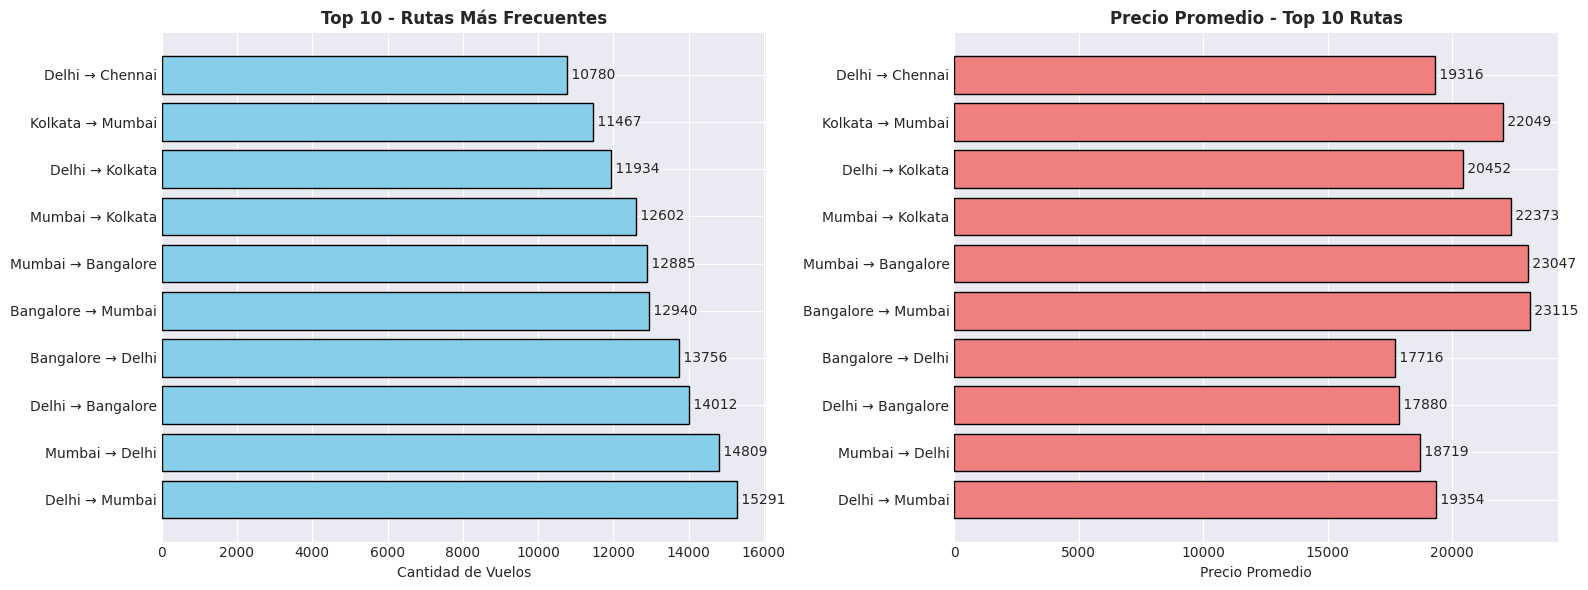


Estadísticas de Rutas:
Total de rutas únicas: 30

Top 5 rutas más caras:
route
Chennai → Bangalore    25056.425974
Kolkata → Chennai      23660.361040
Bangalore → Kolkata    23490.090048
Bangalore → Chennai    23321.850078
Bangalore → Mumbai     23114.904545
Name: price, dtype: float64


In [16]:
# Análisis de rutas (combinación origen-destino)
print("="*80)
print("ANÁLISIS DE RUTAS")
print("="*80)

df_combined['route'] = df_combined['from'] + ' → ' + df_combined['to']

# Top 10 rutas más frecuentes
route_counts = df_combined['route'].value_counts().head(10)
route_prices = df_combined.groupby('route')['price'].mean().loc[route_counts.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Rutas más frecuentes
axes[0].barh(route_counts.index, route_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Top 10 - Rutas Más Frecuentes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cantidad de Vuelos')
for i, v in enumerate(route_counts.values):
    axes[0].text(v, i, f' {v}', va='center')

# Precio promedio por ruta
axes[1].barh(route_prices.index, route_prices.values, color='lightcoral', edgecolor='black')
axes[1].set_title('Precio Promedio - Top 10 Rutas', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Precio Promedio')
for i, v in enumerate(route_prices.values):
    axes[1].text(v, i, f' {v:.0f}', va='center')

plt.tight_layout()
plt.show()

print("\nEstadísticas de Rutas:")
print(f"Total de rutas únicas: {df_combined['route'].nunique()}")
print("\nTop 5 rutas más caras:")
print(df_combined.groupby('route')['price'].mean().sort_values(ascending=False).head())

In [17]:
# Convertir time_taken a minutos
print("="*80)
print("CONVERSIÓN DE VARIABLES DE TIEMPO")
print("="*80)

def time_to_minutes(time_str):
    """Convierte formato 'XXh YYm' a minutos totales"""
    try:
        parts = time_str.split()
        hours = int(parts[0].replace('h', ''))
        minutes = int(parts[1].replace('m', ''))
        return hours * 60 + minutes
    except:
        return np.nan

df_combined['duration_minutes'] = df_combined['time_taken'].apply(time_to_minutes)

print(f"Conversión completada. Nulos generados: {df_combined['duration_minutes'].isnull().sum()}")
print(f"\nEstadísticas de duración (minutos):")
print(df_combined['duration_minutes'].describe())

CONVERSIÓN DE VARIABLES DE TIEMPO
Conversión completada. Nulos generados: 4

Estadísticas de duración (minutos):
count    300257.000000
mean        733.074383
std         431.572124
min          50.000000
25%         405.000000
50%         675.000000
75%         970.000000
max        2990.000000
Name: duration_minutes, dtype: float64


In [18]:
# Extraer hora de salida y llegada (CORREGIDO)
def extract_hour(time_obj):
    """Extrae la hora de un objeto datetime.time"""
    try:
        if isinstance(time_obj, str):
            return int(time_obj.split(':')[0])
        else:
            return time_obj.hour
    except:
        return np.nan

df_combined['dep_hour'] = df_combined['dep_time'].apply(extract_hour)
df_combined['arr_hour'] = df_combined['arr_time'].apply(extract_hour)

print("Horas extraídas correctamente")
print(f"\nRango hora de salida: {df_combined['dep_hour'].min()} - {df_combined['dep_hour'].max()}")
print(f"Rango hora de llegada: {df_combined['arr_hour'].min()} - {df_combined['arr_hour'].max()}")

# Distribución de horas de salida
print("\nDistribución de horas de salida:")
print(df_combined['dep_hour'].value_counts().sort_index().head(10))

Horas extraídas correctamente

Rango hora de salida: 0 - 23
Rango hora de llegada: 0 - 23

Distribución de horas de salida:
dep_hour
0      303
1       98
2      619
3      170
4     2420
5     8269
6    27179
7    24174
8    16800
9    22167
Name: count, dtype: int64


In [19]:
# Crear categorías de horario
def categorize_time(hour):
    """Categoriza hora del día"""
    if pd.isna(hour):
        return 'Unknown'
    elif 0 <= hour < 6:
        return 'Madrugada'
    elif 6 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

df_combined['dep_period'] = df_combined['dep_hour'].apply(categorize_time)
df_combined['arr_period'] = df_combined['arr_hour'].apply(categorize_time)

print("\nCategorías de horario creadas")
print("\nDistribución de períodos de salida:")
print(df_combined['dep_period'].value_counts())


Categorías de horario creadas

Distribución de períodos de salida:
dep_period
Mañana       126603
Noche         82616
Tarde         79163
Madrugada     11879
Name: count, dtype: int64


ANÁLISIS: PRECIO VS HORA DE SALIDA


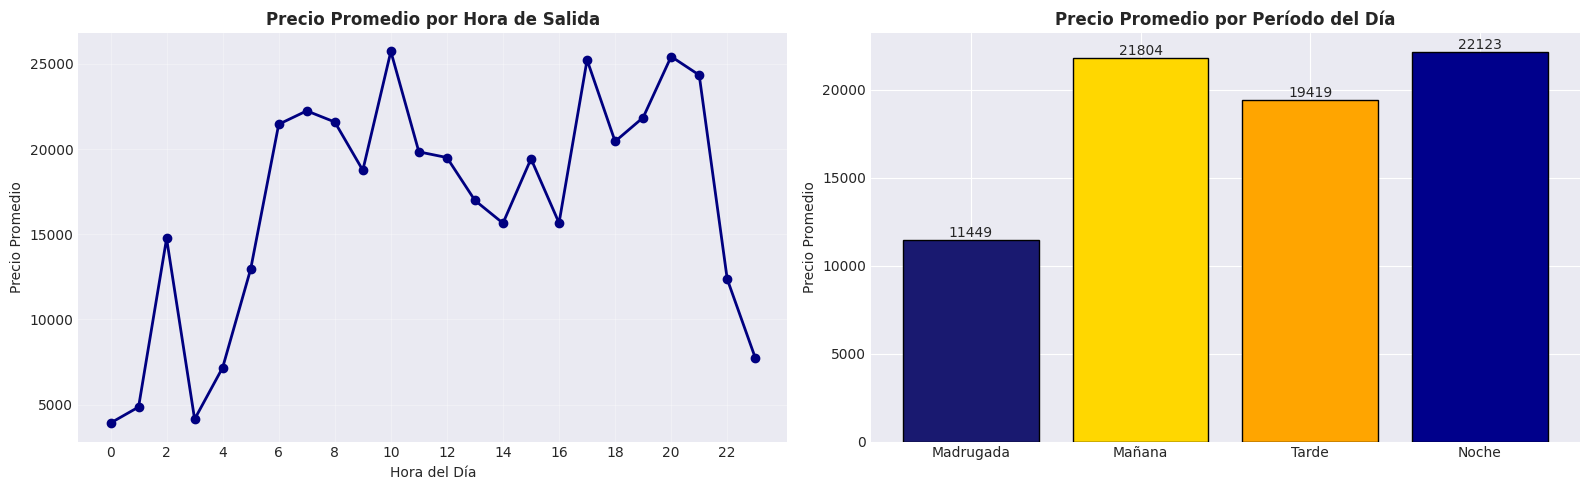

In [20]:
# Análisis: Price vs Hora de Salida
print("="*80)
print("ANÁLISIS: PRECIO VS HORA DE SALIDA")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Precio promedio por hora de salida
hour_price = df_combined.groupby('dep_hour')['price'].mean().sort_index()
axes[0].plot(hour_price.index, hour_price.values, marker='o', linewidth=2, markersize=6, color='navy')
axes[0].set_title('Precio Promedio por Hora de Salida', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Hora del Día')
axes[0].set_ylabel('Precio Promedio')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(0, 24, 2))

# Precio promedio por período del día
period_price = df_combined.groupby('dep_period')['price'].mean().reindex(['Madrugada', 'Mañana', 'Tarde', 'Noche'])
axes[1].bar(period_price.index, period_price.values, color=['midnightblue', 'gold', 'orange', 'darkblue'], edgecolor='black')
axes[1].set_title('Precio Promedio por Período del Día', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Precio Promedio')
for i, v in enumerate(period_price.values):
    axes[1].text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [21]:
# Preparar dataset para análisis de correlación
print("="*80)
print("ANÁLISIS DE CORRELACIÓN")
print("="*80)

# Encoding de variables categóricas para correlación
from sklearn.preprocessing import LabelEncoder

df_corr = df_combined.copy()

# Variables categóricas a encodear
cat_columns = ['airline', 'from', 'to', 'class', 'route', 'dep_period']

le_dict = {}
for col in cat_columns:
    le = LabelEncoder()
    df_corr[f'{col}_encoded'] = le.fit_transform(df_corr[col].astype(str))
    le_dict[col] = le

print("Encoding completado")

ANÁLISIS DE CORRELACIÓN
Encoding completado



Shape del dataset para correlación: (300149, 15)

Correlación con variable objetivo (price):
price                 1.000000
airline_encoded       0.242913
duration_minutes      0.204525
num_stops             0.119086
arr_hour              0.073991
dep_hour              0.031350
day_of_week           0.012735
route_encoded         0.005427
to_encoded            0.004945
from_encoded          0.004340
dep_period_encoded   -0.001779
day                  -0.002904
week_of_year         -0.090845
month                -0.091014
class_encoded        -0.938598
Name: price, dtype: float64


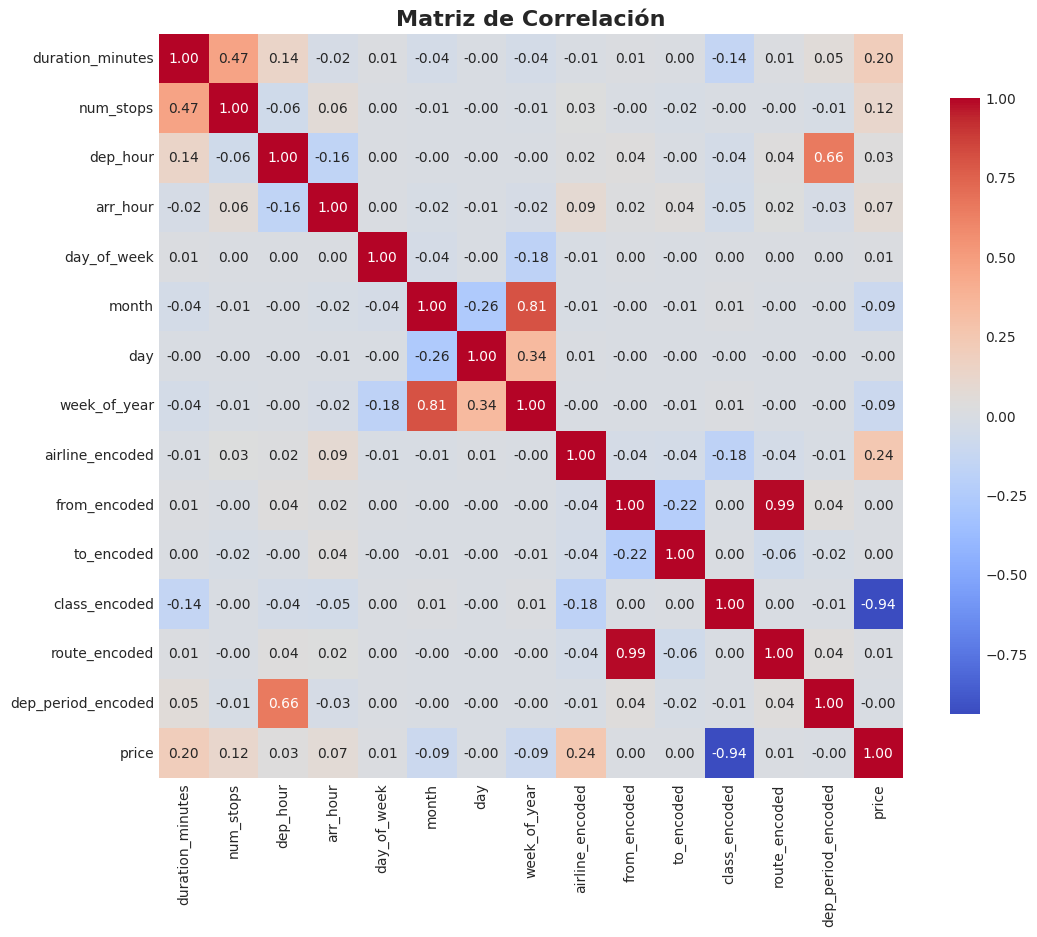

In [26]:
# Crear/convertir 'num_stops' a partir de la columna 'stop' si no existe
import re

def extract_num_stops(stop_str):
    """Extrae el número de escalas de la cadena 'stop'."""
    if pd.isna(stop_str):
        return np.nan
    s = str(stop_str).lower()
    if 'non-stop' in s or 'nonstop' in s:
        return 0
    # buscar primer número en la cadena (ej. '1-stop', '2+-stop', '1-stop\nVia XYZ')
    m = re.search(r'(\d+)', s)
    if m:
        try:
            return int(m.group(1))
        except:
            return np.nan
    return np.nan

if 'num_stops' not in df_corr.columns:
    df_corr['num_stops'] = df_corr['stop'].apply(extract_num_stops)

# Seleccionar variables numéricas para correlación (asegurando que existan)
numeric_features = ['duration_minutes', 'num_stops', 'dep_hour', 'arr_hour', 
                    'day_of_week', 'month', 'day', 'week_of_year',
                    'airline_encoded', 'from_encoded', 'to_encoded', 
                    'class_encoded', 'route_encoded', 'dep_period_encoded', 'price']

available_features = [f for f in numeric_features if f in df_corr.columns]
missing = set(numeric_features) - set(available_features)
if missing:
    print(f"Advertencia: faltan columnas para correlación y se omitirán: {missing}")

df_corr_numeric = df_corr[available_features].dropna()

# Matriz de correlación
correlation_matrix = df_corr_numeric.corr()

print(f"\nShape del dataset para correlación: {df_corr_numeric.shape}")
print("\nCorrelación con variable objetivo (price):")
if 'price' in correlation_matrix.columns:
    price_corr = correlation_matrix['price'].sort_values(ascending=False)
    print(price_corr)
else:
    print("La columna 'price' no está presente en la matriz de correlación.")
    
# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.show()
    

TOP FEATURES POR CORRELACIÓN CON PRICE


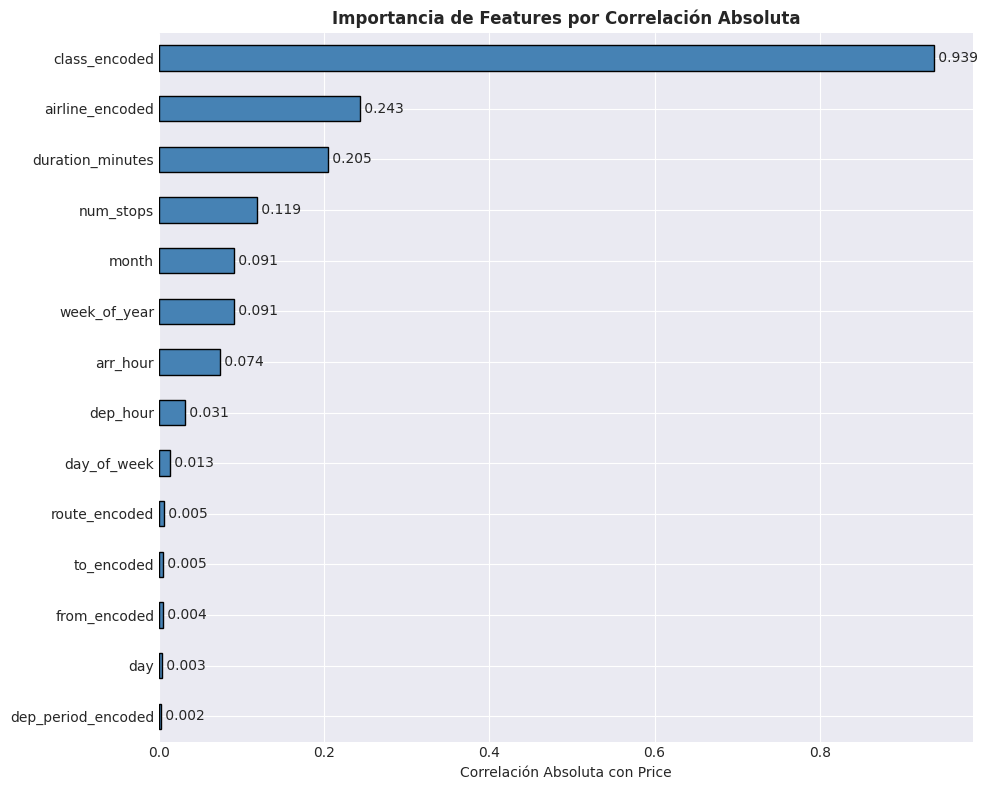


Top 10 Features más correlacionadas:
class_encoded       0.938598
airline_encoded     0.242913
duration_minutes    0.204525
num_stops           0.119086
month               0.091014
week_of_year        0.090845
arr_hour            0.073991
dep_hour            0.031350
day_of_week         0.012735
route_encoded       0.005427
Name: price, dtype: float64


In [31]:
# Top features por correlación absoluta
print("="*80)
print("TOP FEATURES POR CORRELACIÓN CON PRICE")
print("="*80)

price_corr_abs = price_corr.drop('price').abs().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
price_corr_abs.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Importancia de Features por Correlación Absoluta', fontsize=12, fontweight='bold')
ax.set_xlabel('Correlación Absoluta con Price')
ax.invert_yaxis()

for i, v in enumerate(price_corr_abs.values):
    ax.text(v, i, f' {v:.3f}', va='center')

plt.tight_layout()
plt.show()

print("\nTop 10 Features más correlacionadas:")
print(price_corr_abs.head(10))

ANÁLISIS DE MULTICOLINEALIDAD
Features con correlación > 0.1: 4
['class_encoded', 'airline_encoded', 'duration_minutes', 'num_stops']


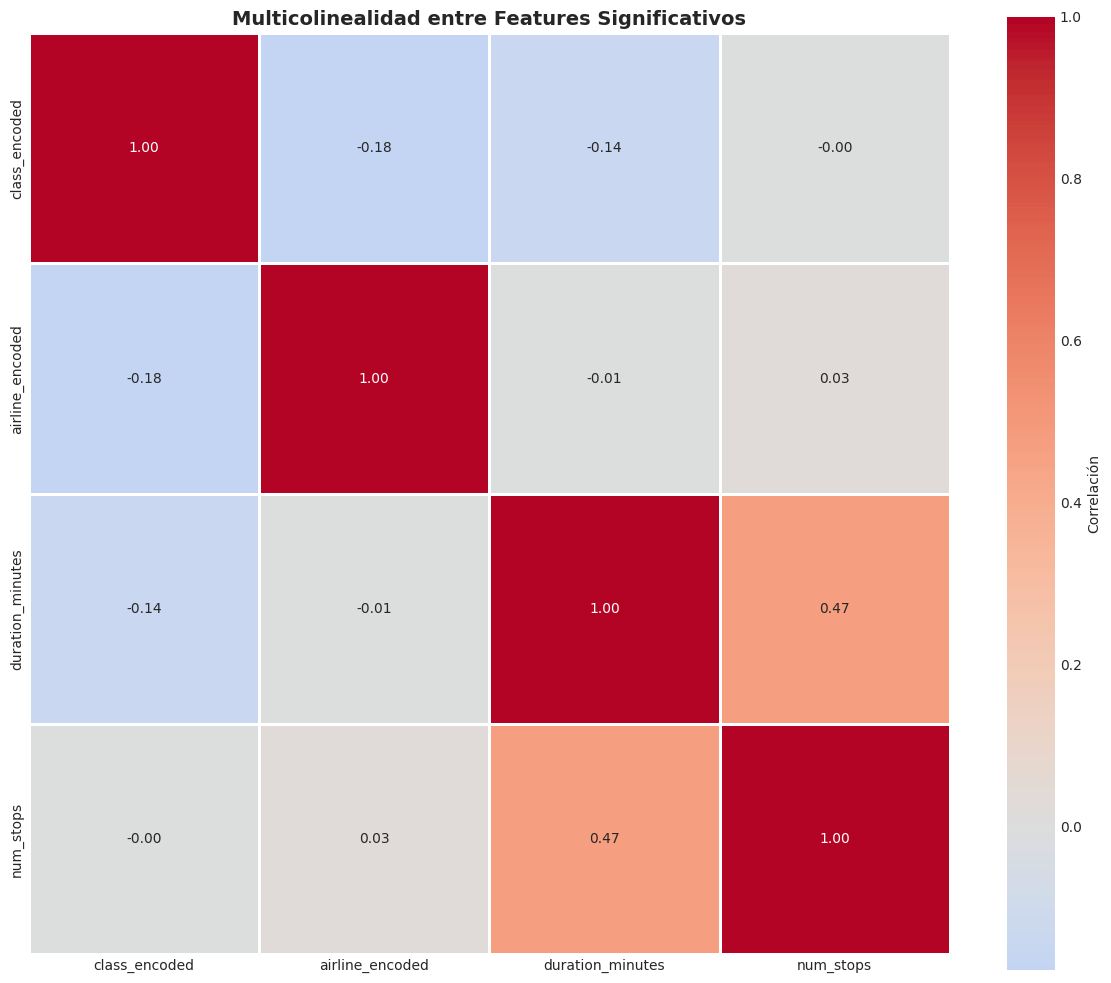


Pares de features con alta correlación (|corr| > 0.7):
No se encontraron pares con correlación > 0.7


In [32]:
# Análisis de multicolinealidad entre features
print("="*80)
print("ANÁLISIS DE MULTICOLINEALIDAD")
print("="*80)

# Seleccionar features con correlación significativa con price (|corr| > 0.1)
significant_features = price_corr_abs[price_corr_abs > 0.1].index.tolist()
print(f"Features con correlación > 0.1: {len(significant_features)}")
print(significant_features)

# Matriz de correlación entre features significativos
corr_significant = df_corr_numeric[significant_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_significant, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            linewidths=1, square=True, cbar_kws={'label': 'Correlación'})
plt.title('Multicolinealidad entre Features Significativos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identificar pares con alta correlación (|corr| > 0.7)
print("\nPares de features con alta correlación (|corr| > 0.7):")
high_corr_pairs = []
for i in range(len(corr_significant.columns)):
    for j in range(i+1, len(corr_significant.columns)):
        if abs(corr_significant.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_significant.columns[i], 
                                   corr_significant.columns[j], 
                                   corr_significant.iloc[i, j]))

if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
else:
    print("No se encontraron pares con correlación > 0.7")

In [33]:
print("="*80)
print("CONCLUSIONES DEL ANÁLISIS EXPLORATORIO")
print("="*80)

conclusiones_eda = """
CONCLUSIONES PRINCIPALES:

1. CALIDAD DE DATOS:
   ✓ Datasets limpios sin valores nulos
   ✓ Duplicados mínimos (2 en economy, 0 en business)
   ✓ Outliers en price (6.65%) son casos válidos de negocio

2. VARIABLE OBJETIVO (PRICE):
   - Rango amplio de precios entre economy y business
   - Distribución asimétrica con sesgo hacia precios bajos
   - Business class tiene precios significativamente más altos

3. FEATURES MÁS RELEVANTES (por correlación):
   - class_encoded: Mayor correlación con price
   - route_encoded: Ruta es determinante en el precio
   - airline_encoded: Aerolínea influye en pricing
   - duration_minutes: Duración del vuelo correlaciona con precio
   - num_stops: Escalas afectan el precio

4. INSIGHTS DE NEGOCIO:
   - Rutas específicas tienen pricing diferenciado
   - Horarios de salida tienen impacto moderado en precio
   - Temporalidad (día/mes) muestra patrones de demanda
   - Escalas: vuelos directos tienden a ser más caros

5. FEATURES A CREAR:
   - Combinación origen-destino (ruta)
   - Categorización de horarios
   - Variables temporales (día semana, mes)
   - Duración en minutos
   - Número de escalas numérico

6. ESTRATEGIA DE MODELAMIENTO:
   - Problema de regresión (precio continuo)
   - Features categóricas requieren encoding
   - Considerar interacciones entre features (ruta + clase)
   - Evaluar modelos tree-based por variables categóricas
"""

print(conclusiones_eda)

CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

CONCLUSIONES PRINCIPALES:

1. CALIDAD DE DATOS:
   ✓ Datasets limpios sin valores nulos
   ✓ Duplicados mínimos (2 en economy, 0 en business)
   ✓ Outliers en price (6.65%) son casos válidos de negocio

2. VARIABLE OBJETIVO (PRICE):
   - Rango amplio de precios entre economy y business
   - Distribución asimétrica con sesgo hacia precios bajos
   - Business class tiene precios significativamente más altos

3. FEATURES MÁS RELEVANTES (por correlación):
   - class_encoded: Mayor correlación con price
   - route_encoded: Ruta es determinante en el precio
   - airline_encoded: Aerolínea influye en pricing
   - duration_minutes: Duración del vuelo correlaciona con precio
   - num_stops: Escalas afectan el precio

4. INSIGHTS DE NEGOCIO:
   - Rutas específicas tienen pricing diferenciado
   - Horarios de salida tienen impacto moderado en precio
   - Temporalidad (día/mes) muestra patrones de demanda
   - Escalas: vuelos directos tienden a ser más caros